In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from collections import defaultdict

In [2]:
t = pd.read_csv('../foodwebs/guittar2019/SILVA_taxonomy.csv') # taxonomy

In [3]:
m = pd.read_csv('../foodwebs/guittar2019/metadata.csv') # metadata

In [5]:
d = pd.read_csv('../foodwebs/guittar2019/otus.csv') # otu table

In [16]:
d.head()

,Unnamed: 0,sampleID,subject,t,OTU1,OTU10,OTU100,OTU1000,OTU1002,OTU1003,...,OTU989,OTU99,OTU990,OTU991,OTU992,OTU993,OTU995,OTU997,OTU998,OTU999
0,1,E000823_1.8,E000823,1.8,265,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,E000823_10.5,E000823,10.5,74,0,37,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,3,E000823_12.5,E000823,12.5,214,295,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,E000823_14,E000823,14.0,753,359,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0
4,5,E000823_15.7,E000823,15.7,736,188,0,0,0,0,...,0,9,0,0,0,0,0,0,0,0


In [15]:
subjects = {}
count = 1
for key, row in d.iterrows():
    if row["subject"] not in subjects:
        subjects[row["subject"]] = count
        count +=1
d["subject_num"] = d["subject"].apply(lambda x: subjects[x]) # create subject_num for plotting purposes

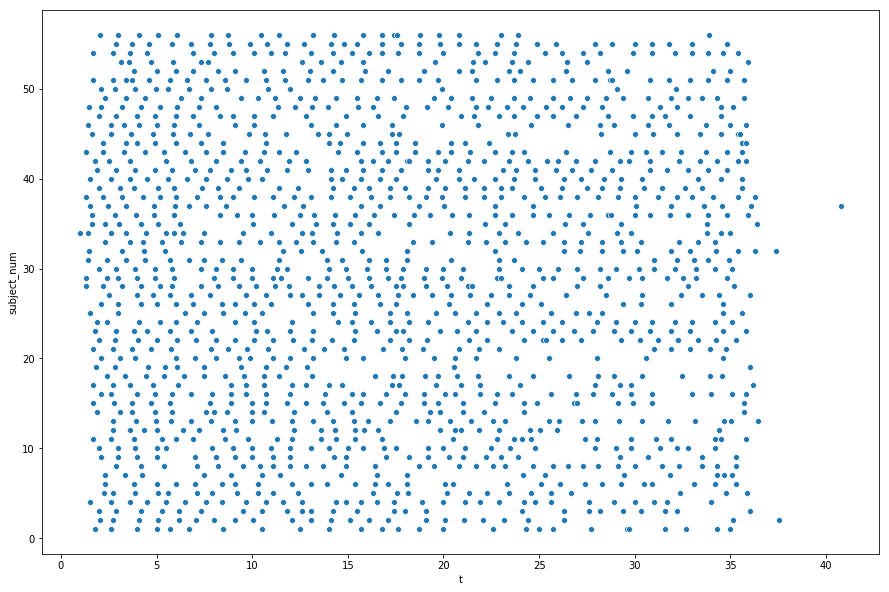

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="t", y="subject_num", data=d)
plt.show()

In [7]:
from skbio.diversity import beta_diversity

In [24]:
## Get just the OTU data rows (not the metadata rows)
otus = [item for item in d.columns if 'OTU' in item]
data= d[otus]

In [28]:
rel_abund = data.div(data.sum(axis=1), axis=0) ## This is a relative abundance table

In [21]:
#Example for calculating bray-curtis between all samples
data_np = np.asarray(d[otus])
b = beta_diversity("braycurtis", data_np)
print(b)

1481x1481 distance matrix
IDs:
'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', ...
Data:
[[0.     0.5916 0.8226 ... 0.5218 0.7526 0.7114]
 [0.5916 0.     0.5626 ... 0.77   0.7368 0.749 ]
 [0.8226 0.5626 0.     ... 0.8968 0.8216 0.8582]
 ...
 [0.5218 0.77   0.8968 ... 0.     0.5282 0.5276]
 [0.7526 0.7368 0.8216 ... 0.5282 0.     0.2452]
 [0.7114 0.749  0.8582 ... 0.5276 0.2452 0.    ]]


In [55]:
abund_subject[abund_subject.columns[0]].index

Int64Index([1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480],
           dtype='int64')

In [57]:
d_subject['t'][1460]

10.48

In [51]:
for n in abund_subject[abund_subject.columns[0]]:
    print(n)

0.0186
0.2676
0.0932
0.1036
0.0414
0.0942
0.145
0.1264
0.0348
0.0202
0.002
0.0766
0.1256
0.0388
0.0446
0.1056
0.02
0.0006
0.0802
0.1602
0.205


In [67]:
### Q1: does presence / absence at initial time correlate with end point abund?

## Output: OTU, SUBJECT, P/A at T=0, t=END abund
q1_dataframe = defaultdict(list)
for subject in d['subject'].unique():
    # create DF for just this subject
    d_subject = d[d.subject == subject]
    data_subject = d_subject[otus]
    abund_subject = data_subject.div(data_subject.sum(axis=1), axis=0)
    # filter to OTUs found at least >5% once in this subject
    abund_subject = abund_subject[abund_subject.columns[abund_subject.max() > 0.05]]
    #get start day and end day
    start_day = d_subject['t'][d_subject.index[0]]
    end_day = d_subject['t'][d_subject.index[-1]]
    #add each OTU to the dataframe
    
    for otu in abund_subject.columns:
        if list(abund_subject[otu])[0] == 0:
            present = 0
        else:
            present = 1
        end_abund = list(abund_subject[otu])[-1]
        
        # let's get day of arrival
        i = 0
        for day in abund_subject[otu].index:
            if abund_subject[otu][day] > 0:
                arrival = d_subject['t'][day]
                break
            i += 1
        q1_dataframe['OTU'].append(otu)
        q1_dataframe['subject'].append(subject)
        q1_dataframe['t0_presence'].append(present)
        q1_dataframe['day_of_arrival'].append(arrival)
        q1_dataframe['final_abund'].append(end_abund)
        q1_dataframe['start_time'].append(start_day)
        q1_dataframe['end_time'].append(end_day)
q1_data = pd.DataFrame(q1_dataframe)

In [ ]:
### Q2: does Day of Arrival correlate with end point abund?

In [ ]:
### Q3: how does Q1 effect change over time?

In [ ]:
### Q4: how does Q1 effect change w/ antibiotics?

In [ ]:
### Q5: does arrival of some microbes cause an increase in community velocity?

In [12]:
### Q6: how does community velocity change over time?

In [13]:
### Q7: do some microbes cause a disproporition increase in velocity (controlled)?